In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, ensemble
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import load_iris
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from IPython.display import clear_output

In [3]:
inputs = np.load ("./initial_inputs.npy")
outputs = np.load ("./initial_outputs.npy")

In [5]:
inputs

array([[0.60499445, 0.29221502, 0.90845275, 0.35550624, 0.20166872,
        0.57533801, 0.31031095, 0.73428138],
       [0.17800696, 0.56622265, 0.99486184, 0.21032501, 0.32015266,
        0.70790879, 0.63538449, 0.10713163],
       [0.00907698, 0.81162615, 0.52052036, 0.07568668, 0.26511183,
        0.09165169, 0.59241515, 0.36732026],
       [0.50602816, 0.65373012, 0.36341078, 0.17798105, 0.0937283 ,
        0.19742533, 0.7558269 , 0.29247234],
       [0.35990926, 0.24907568, 0.49599717, 0.70921498, 0.11498719,
        0.28920692, 0.55729515, 0.59388173],
       [0.77881834, 0.0034195 , 0.33798313, 0.51952778, 0.82090699,
        0.53724669, 0.5513471 , 0.66003209],
       [0.90864932, 0.0622497 , 0.23825955, 0.76660355, 0.13233596,
        0.99024381, 0.68806782, 0.74249594],
       [0.58637144, 0.88073573, 0.74502075, 0.54603485, 0.00964888,
        0.74899176, 0.23090707, 0.09791562],
       [0.76113733, 0.85467239, 0.38212433, 0.33735198, 0.68970832,
        0.30985305, 0.631379

In [7]:
outputs

array([7.3987211 , 7.00522736, 8.45948162, 8.28400781, 8.60611679,
       8.54174792, 7.32743458, 7.29987205, 7.95787474, 5.59219339,
       7.85454099, 6.79198578, 8.97655402, 7.3790829 , 9.598482  ,
       8.15998319, 7.13162397, 6.76796253, 7.43374407, 9.01307515,
       7.31089382, 5.84106731, 9.14163949, 8.81755844, 6.45194313,
       8.83074505, 9.34427428, 6.88784639, 8.04221254, 7.69236805,
       7.92375877, 8.42175924, 8.2780624 , 7.11345716, 6.40258841,
       8.47293632, 7.97768459, 7.46087219, 7.43659353, 9.18300525])

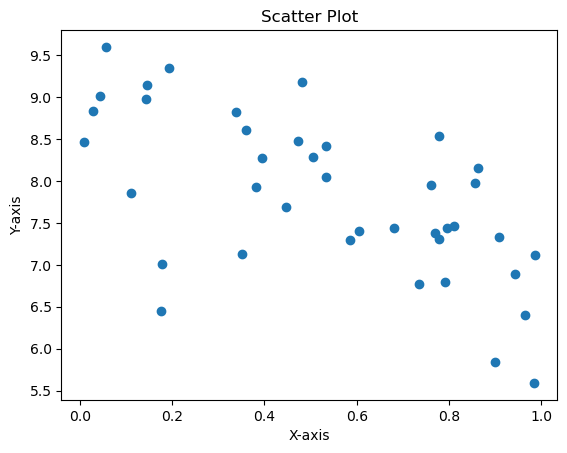

In [9]:
x = inputs[:,0]
y = outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

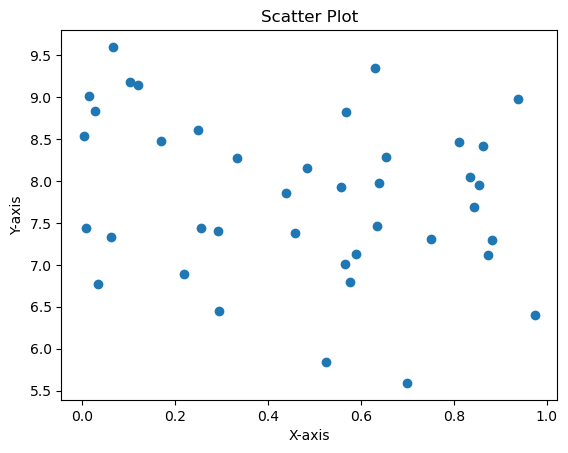

In [11]:
x = inputs[:,1]
y =  outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

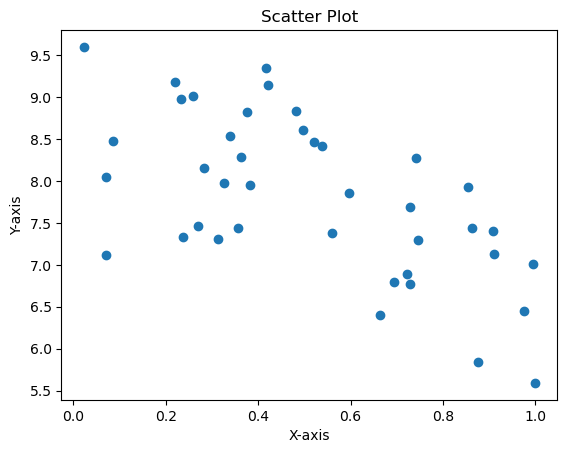

In [13]:
x = inputs[:,2]
y =  outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

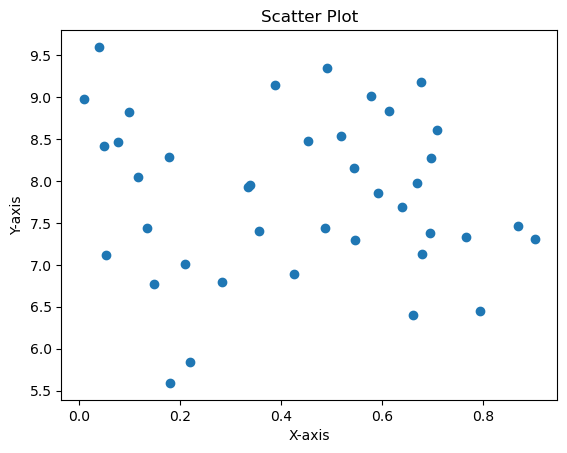

In [15]:
x = inputs[:,3]
y =  outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

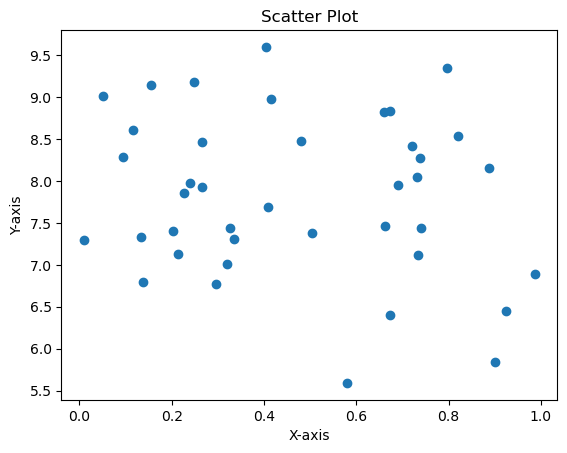

In [17]:
x = inputs[:,4]
y =  outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

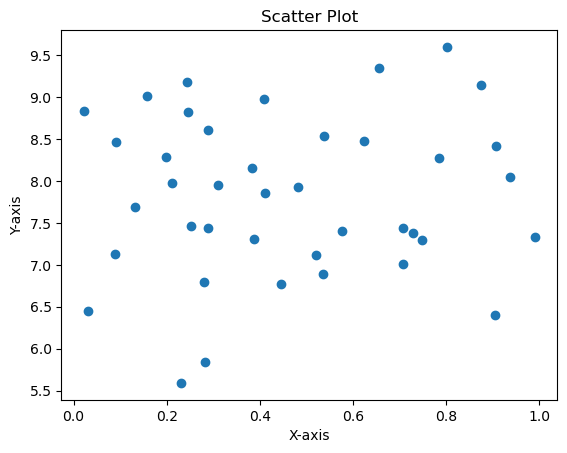

In [19]:
x = inputs[:,5]
y =  outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

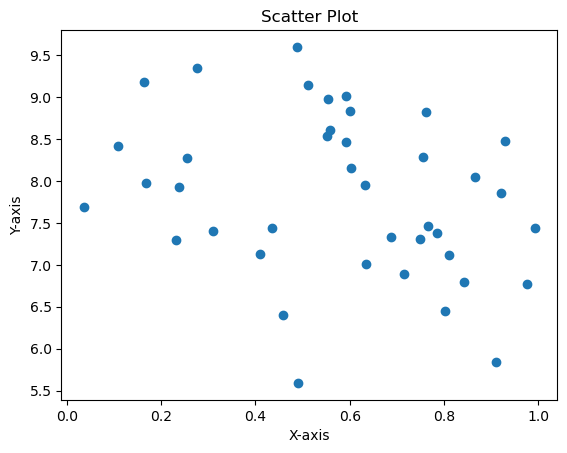

In [21]:
x = inputs[:,6]
y =  outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

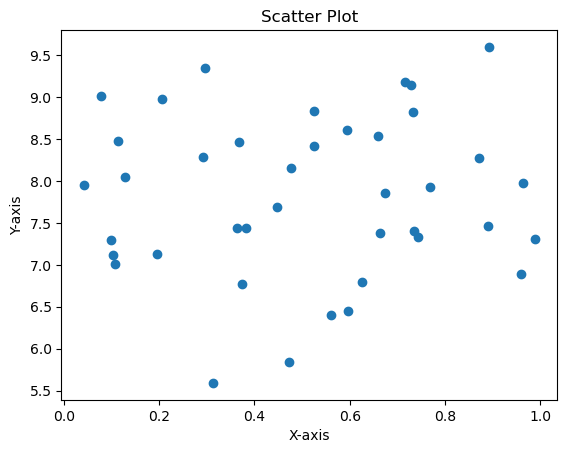

In [23]:
x = inputs[:,7]
y =  outputs

# Create the scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot")

# Show the plot
plt.show()

In [25]:
data = {'feature1': inputs[:,0],
        'feature2': inputs[:,1],
        'feature3': inputs[:,2],
        'feature4': inputs[:,3],
        'feature5': inputs[:,4],
        'feature6': inputs[:,5],
        'feature7': inputs[:,6],
        'feature8': inputs[:,7],
        'target': outputs
       }

df = pd.DataFrame(data)
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
0,0.604994,0.292215,0.908453,0.355506,0.201669,0.575338,0.310311,0.734281,7.398721
1,0.178007,0.566223,0.994862,0.210325,0.320153,0.707909,0.635384,0.107132,7.005227
2,0.009077,0.811626,0.520520,0.075687,0.265112,0.091652,0.592415,0.367320,8.459482
3,0.506028,0.653730,0.363411,0.177981,0.093728,0.197425,0.755827,0.292472,8.284008
4,0.359909,0.249076,0.495997,0.709215,0.114987,0.289207,0.557295,0.593882,8.606117
5,0.778818,0.003419,0.337983,0.519528,0.820907,0.537247,0.551347,0.660032,8.541748
6,0.908649,0.062250,0.238260,0.766604,0.132336,0.990244,0.688068,0.742496,7.327435
7,0.586371,0.880736,0.745021,0.546035,0.009649,0.748992,0.230907,0.097916,7.299872
8,0.761137,0.854672,0.382124,0.337352,0.689708,0.309853,0.631380,0.041956,7.957875
9,0.984933,0.699506,0.998885,0.180148,0.580143,0.231087,0.490827,0.313683,5.592193


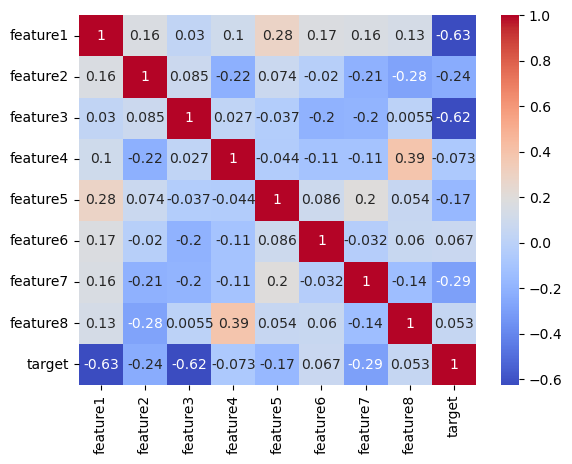

In [27]:
# Display correlation to Output Outcome
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import seaborn as sns
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  40 non-null     float64
 1   feature2  40 non-null     float64
 2   feature3  40 non-null     float64
 3   feature4  40 non-null     float64
 4   feature5  40 non-null     float64
 5   feature6  40 non-null     float64
 6   feature7  40 non-null     float64
 7   feature8  40 non-null     float64
 8   target    40 non-null     float64
dtypes: float64(9)
memory usage: 2.9 KB


In [31]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.534609,0.472150,0.515970,0.430449,0.468951,0.460126,0.579196,0.506720,7.815274
std,0.310676,0.309706,0.282440,0.261479,0.281380,0.277376,0.257913,0.281347,0.958966
min,0.009077,0.003419,0.022929,0.009043,0.009649,0.022113,0.035909,0.041956,5.592193
25%,0.302376,0.206189,0.306074,0.179607,0.236969,0.245246,0.428796,0.294756,7.257810
50%,0.532770,0.540389,0.488684,0.470111,0.411933,0.409715,0.596949,0.525116,7.889150
75%,0.792979,0.712416,0.732348,0.663788,0.722449,0.706965,0.770316,0.729496,8.490139
max,0.985945,0.973980,0.998885,0.902986,0.986902,0.990244,0.992914,0.988755,9.598482


In [35]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.534609,0.472150,0.515970,0.430449,0.468951,0.460126,0.579196,0.506720,7.815274
std,0.310676,0.309706,0.282440,0.261479,0.281380,0.277376,0.257913,0.281347,0.958966
min,0.009077,0.003419,0.022929,0.009043,0.009649,0.022113,0.035909,0.041956,5.592193
10%,0.106509,0.033979,0.206180,0.073477,0.130601,0.128546,0.224571,0.106755,6.736361
25%,0.302376,0.206189,0.306074,0.179607,0.236969,0.245246,0.428796,0.294756,7.257810
50%,0.532770,0.540389,0.488684,0.470111,0.411933,0.409715,0.596949,0.525116,7.889150
75%,0.792979,0.712416,0.732348,0.663788,0.722449,0.706965,0.770316,0.729496,8.490139
90%,0.912103,0.863383,0.908551,0.714954,0.827565,0.878178,0.912094,0.890802,9.025932
max,0.985945,0.973980,0.998885,0.902986,0.986902,0.990244,0.992914,0.988755,9.598482


In [37]:
df.describe(percentiles=[0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.99, 1])

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,target
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.534609,0.472150,0.515970,0.430449,0.468951,0.460126,0.579196,0.506720,7.815274
std,0.310676,0.309706,0.282440,0.261479,0.281380,0.277376,0.257913,0.281347,0.958966
min,0.009077,0.003419,0.022929,0.009043,0.009649,0.022113,0.035909,0.041956,5.592193
50%,0.532770,0.540389,0.488684,0.470111,0.411933,0.409715,0.596949,0.525116,7.889150
65%,0.764210,0.632206,0.674525,0.582940,0.665680,0.550579,0.726723,0.661117,8.280143
70%,0.778487,0.643345,0.723238,0.620968,0.678098,0.632078,0.757824,0.687115,8.433076
75%,0.792979,0.712416,0.732348,0.663788,0.722449,0.706965,0.770316,0.729496,8.490139
80%,0.819227,0.816039,0.766637,0.677540,0.734803,0.732475,0.804812,0.735924,8.648405
85%,0.867905,0.845561,0.864377,0.695093,0.748855,0.786369,0.846328,0.784009,8.852616


In [33]:
df.value_counts()

feature1  feature2  feature3  feature4  feature5  feature6  feature7  feature8  target  
0.009077  0.811626  0.520520  0.075687  0.265112  0.091652  0.592415  0.367320  8.459482    1
0.028947  0.028279  0.481372  0.613175  0.672660  0.022113  0.601483  0.524885  8.830745    1
0.604994  0.292215  0.908453  0.355506  0.201669  0.575338  0.310311  0.734281  7.398721    1
0.680294  0.255105  0.862188  0.134396  0.326329  0.287907  0.435010  0.364200  7.433744    1
0.735904  0.034612  0.728030  0.147427  0.295743  0.445117  0.975180  0.374340  6.767963    1
0.761137  0.854672  0.382124  0.337352  0.689708  0.309853  0.631380  0.041956  7.957875    1
0.769917  0.458759  0.559000  0.694604  0.503199  0.728346  0.784254  0.663131  7.379083    1
0.778345  0.751146  0.314142  0.902986  0.335382  0.386323  0.748972  0.988755  7.310894    1
0.778818  0.003419  0.337983  0.519528  0.820907  0.537247  0.551347  0.660032  8.541748    1
0.791888  0.576191  0.694528  0.283424  0.136755  0.279162  0.842

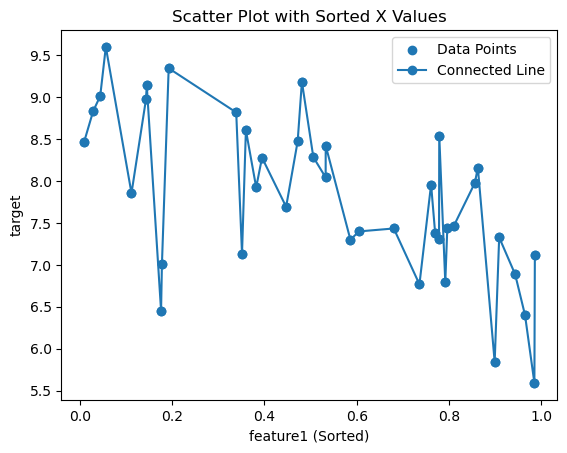

In [41]:
x = df["feature1"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature1 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

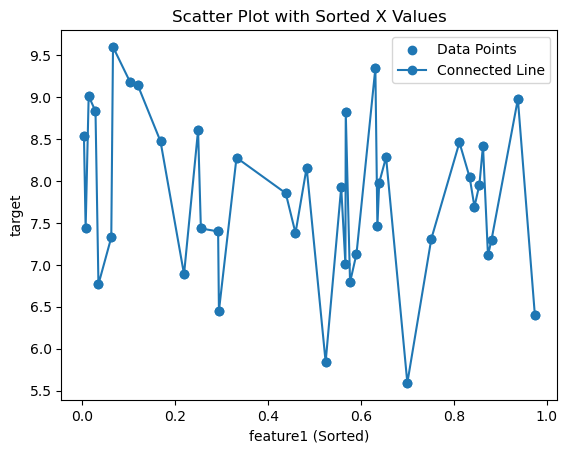

In [43]:
x = df["feature2"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature2 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

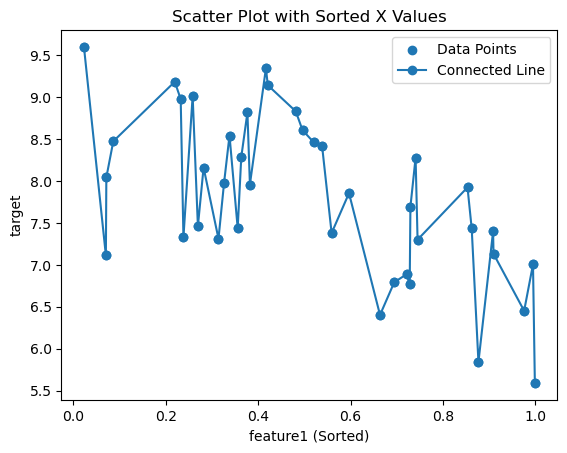

In [45]:
x = df["feature3"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature3 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

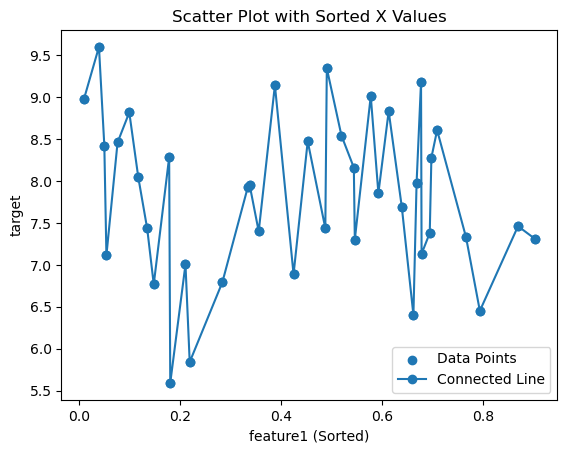

In [47]:
x = df["feature4"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature4 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

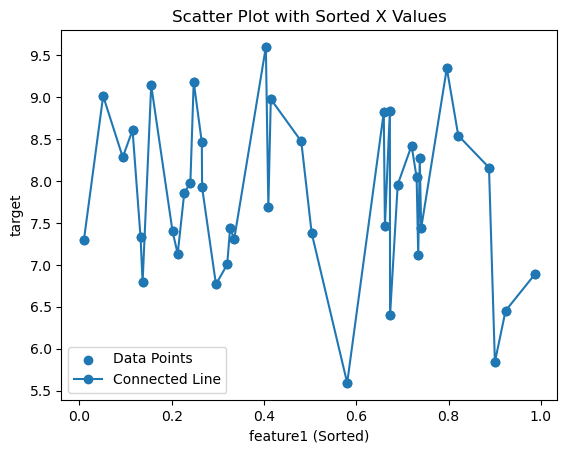

In [49]:
x = df["feature5"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature5 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

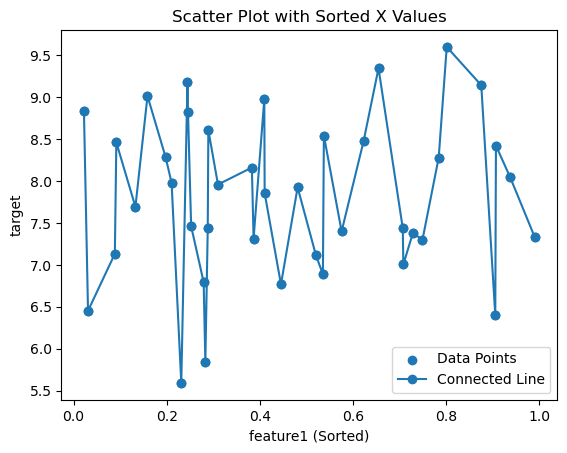

In [51]:
x = df["feature6"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature6 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

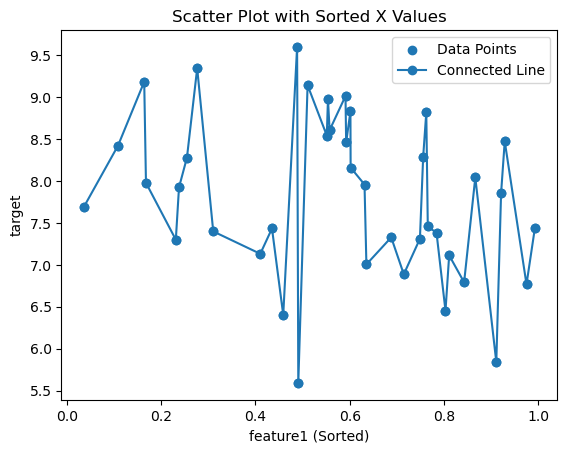

In [53]:
x = df["feature7"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature7 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()

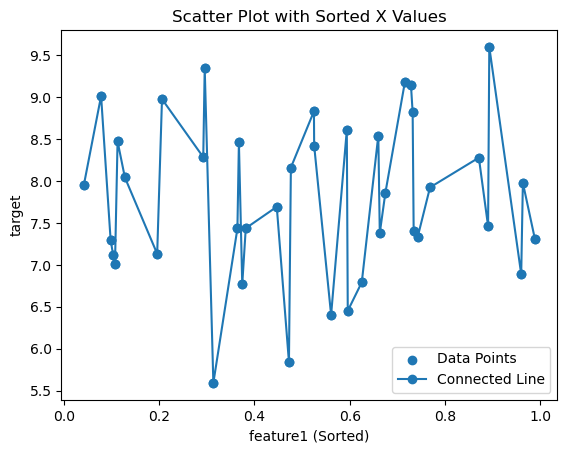

In [55]:
x = df["feature8"]
y = df["target"]

# Sort x values and get corresponding y values
sorted_indices = np.argsort(x)
x_sorted = np.array(x)[sorted_indices]
y_sorted = np.array(y)[sorted_indices]

# Create the scatter plot
plt.scatter(x_sorted, y_sorted, label='Data Points')


# Connect the dots with a line
#plt.plot(x, y, linestyle='-', marker='o', label='Connected Line')
plt.plot(x_sorted, y_sorted, linestyle='-', marker='o', label='Connected Line')

# Add labels and title
#plt.xlabel("X-axis")
#plt.ylabel("Y-axis")
#plt.title("Scatter Plot")

# Add labels and title
plt.xlabel('feature8 (Sorted)')
plt.ylabel('target')
plt.title('Scatter Plot with Sorted X Values')

# Add legend
plt.legend()

# Show the plot
plt.show()